# Codeacademy Project: Tennis Ace
## Project Introduction
* This is a project offered by Codeacademy in the Multiple Regression chapter in the Machine Learning Path. 

* Instruction for obtaining the Codeacademy data: For anyone wondering how I managed to get the csv file from code academy: You can open the csv file in the website, then copy all the comma seperated values into a notepad (or any text file). You can then read the text into an excel file from the Excel section/ribbon: Data --- > From Text/CSV. You can then save it as a .csv file. 

### The description of the column names (from Codeacademy)
The ATP men’s tennis dataset includes a wide array of tennis statistics, which are described below:

#### Identifying Data
* Player: name of the tennis player
* Year: year data was recorded

#### Service Game Columns (Offensive)
* Aces: number of serves by the player where the receiver does not touch the ball
* DoubleFaults: number of times player missed both first and second serve attempts
* FirstServe: % of first-serve attempts made
* FirstServePointsWon: % of first-serve attempt points won by the player
* SecondServePointsWon: % of second-serve attempt points won by the player
* BreakPointsFaced: number of times where the receiver could have won service game of the player
* BreakPointsSaved: % of the time the player was able to stop the receiver from winning service game when they had the chance
* ServiceGamesPlayed: total number of games where the player served
* ServiceGamesWon: total number of games where the player served and won
* TotalServicePointsWon: % of points in games where the player served that they won

#### Return Game Columns (Defensive)
* FirstServeReturnPointsWon: % of opponents first-serve points the player was able to win
* SecondServeReturnPointsWon: % of opponents second-serve points the player was able to win
* BreakPointsOpportunities: number of times where the player could have won the service game of the opponent
* BreakPointsConverted: % of the time the player was able to win their opponent’s service game when they had the chance
* ReturnGamesPlayed: total number of games where the player’s opponent served
* ReturnGamesWon: total number of games where the player’s opponent served and the player won
* ReturnPointsWon: total number of points where the player’s opponent served and the player won
* TotalPointsWon: % of points won by the player

#### Outcomes
* Wins: number of matches won in a year
* Losses: number of matches lost in a year
* Winnings: total winnings in USD($) in a year
* Ranking: ranking at the end of year

### Overview:
#### * There are several features and outcomes in this dataset. In this project/notebook I will attempt to model the best linear regression model that can explain/predict a Tennis player's winnings/earnings.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')
import scipy.stats as stats
#from scipy.stats import shapiro # Did not use, relied on visualization of distribution instead
#from scipy.stats import lognorm # Did not use. I used the PowerTransformer for normalizing and standarizing

In [3]:
#read the data into a pandas dataframe
df = pd.read_csv("Tennis Data.csv")

## General exploration of the data
I do a light exploration of the data just to get a feel of the data I am working with.
* There are 24 columns (features), 4 of which are the "Outcome" features ("Wins", "Losses", "Winnings","Ranking")
* Because this is a project for machine learning practice, the data is quite clean and already processed. So, there are no null values
* There are 438 players included in the data
* The data is for the years from 2009 to 2017
* The highest ATP ranking in the data is 3rd and lowest ranking is 1443rd
* The maximum earnings per year ("Winnings") earned by a player is USD 107,4562 is The minimum USD 108.0000
* All columns, with the exception of players names, are numerical.


In [4]:
df.head()

,Player,Year,FirstServe,FirstServePointsWon,FirstServeReturnPointsWon,SecondServePointsWon,SecondServeReturnPointsWon,Aces,BreakPointsConverted,BreakPointsFaced,...,ReturnGamesWon,ReturnPointsWon,ServiceGamesPlayed,ServiceGamesWon,TotalPointsWon,TotalServicePointsWon,Wins,Losses,Winnings,Ranking
0,Pedro Sousa,2016,0.88,0.50,0.38,0.50,0.39,0,0.14,7,...,0.11,0.38,8,0.50,0.43,0.50,1,2,39820,119
1,Roman Safiullin,2017,0.84,0.62,0.26,0.33,0.07,7,0.00,7,...,0.00,0.20,9,0.67,0.41,0.57,0,1,17334,381
2,Pedro Sousa,2017,0.83,0.60,0.28,0.53,0.44,2,0.38,10,...,0.16,0.34,17,0.65,0.45,0.59,4,1,109827,119
3,Rogerio Dutra Silva,2010,0.83,0.64,0.34,0.59,0.33,2,0.33,5,...,0.14,0.34,15,0.80,0.49,0.63,0,0,9761,125
4,Daniel Gimeno-Traver,2017,0.81,0.54,0.00,0.33,0.33,1,0.00,2,...,0.00,0.20,2,0.50,0.35,0.50,0,1,32879,272


In [5]:
df.describe()

,Year,FirstServe,FirstServePointsWon,FirstServeReturnPointsWon,SecondServePointsWon,SecondServeReturnPointsWon,Aces,BreakPointsConverted,BreakPointsFaced,BreakPointsOpportunities,...,ReturnGamesWon,ReturnPointsWon,ServiceGamesPlayed,ServiceGamesWon,TotalPointsWon,TotalServicePointsWon,Wins,Losses,Winnings,Ranking
count,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,...,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1.721000e+03,1721.000000
mean,2013.646717,0.598053,0.680738,0.261673,0.479733,0.466432,97.105171,0.369407,112.003486,102.918071,...,0.173823,0.342208,197.650203,0.715590,0.473155,0.599245,7.876816,9.278908,2.344928e+05,269.610691
std,2.488018,0.054533,0.070422,0.056639,0.066902,0.068447,137.966077,0.162987,119.247651,122.761670,...,0.080880,0.049369,221.208703,0.123287,0.037139,0.057718,10.183716,8.996450,2.530537e+05,277.341947
min,2009.000000,0.360000,0.270000,0.000000,0.060000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.220000,0.250000,0.000000,0.000000,1.080000e+02,3.000000
25%,2012.000000,0.570000,0.650000,0.240000,0.460000,0.440000,7.000000,0.320000,15.000000,9.000000,...,0.130000,0.320000,22.000000,0.670000,0.460000,0.570000,0.000000,2.000000,4.931100e+04,83.000000
50%,2014.000000,0.600000,0.690000,0.270000,0.490000,0.480000,34.000000,0.380000,55.000000,41.000000,...,0.180000,0.350000,86.000000,0.750000,0.480000,0.610000,3.000000,5.000000,1.252120e+05,166.000000
75%,2016.000000,0.630000,0.720000,0.290000,0.520000,0.500000,140.000000,0.430000,201.000000,172.000000,...,0.220000,0.370000,348.000000,0.790000,0.500000,0.630000,13.000000,17.000000,3.500750e+05,333.000000
max,2017.000000,0.880000,0.890000,0.480000,0.920000,0.750000,1185.000000,1.000000,507.000000,573.000000,...,0.560000,0.510000,916.000000,1.000000,0.820000,0.820000,48.000000,36.000000,1.074562e+06,1443.000000


In [6]:
df.shape

(1721, 24)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1721 entries, 0 to 1720
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Player                      1721 non-null   object 
 1   Year                        1721 non-null   int64  
 2   FirstServe                  1721 non-null   float64
 3   FirstServePointsWon         1721 non-null   float64
 4   FirstServeReturnPointsWon   1721 non-null   float64
 5   SecondServePointsWon        1721 non-null   float64
 6   SecondServeReturnPointsWon  1721 non-null   float64
 7   Aces                        1721 non-null   int64  
 8   BreakPointsConverted        1721 non-null   float64
 9   BreakPointsFaced            1721 non-null   int64  
 10  BreakPointsOpportunities    1721 non-null   int64  
 11  BreakPointsSaved            1721 non-null   float64
 12  DoubleFaults                1721 non-null   int64  
 13  ReturnGamesPlayed           1721 

In [8]:
df["Player"].nunique()

438

In [9]:
df.columns

Index(['Player', 'Year', 'FirstServe', 'FirstServePointsWon',
       'FirstServeReturnPointsWon', 'SecondServePointsWon',
       'SecondServeReturnPointsWon', 'Aces', 'BreakPointsConverted',
       'BreakPointsFaced', 'BreakPointsOpportunities', 'BreakPointsSaved',
       'DoubleFaults', 'ReturnGamesPlayed', 'ReturnGamesWon',
       'ReturnPointsWon', 'ServiceGamesPlayed', 'ServiceGamesWon',
       'TotalPointsWon', 'TotalServicePointsWon', 'Wins', 'Losses', 'Winnings',
       'Ranking'],
      dtype='object')

##### Created two different dataframes for features and outcomes

In [10]:
# Make a dataframe for the Tennis players' playing features only
# Drop the Identifying data (player and years columns), as well as the outcome features. 
Features = df.drop(columns = ['Player', 'Year', 'Wins', 'Losses', 'Winnings', 'Ranking'], axis =1)
Features.columns

Index(['FirstServe', 'FirstServePointsWon', 'FirstServeReturnPointsWon',
       'SecondServePointsWon', 'SecondServeReturnPointsWon', 'Aces',
       'BreakPointsConverted', 'BreakPointsFaced', 'BreakPointsOpportunities',
       'BreakPointsSaved', 'DoubleFaults', 'ReturnGamesPlayed',
       'ReturnGamesWon', 'ReturnPointsWon', 'ServiceGamesPlayed',
       'ServiceGamesWon', 'TotalPointsWon', 'TotalServicePointsWon'],
      dtype='object')

In [11]:
# Make a dataframe for the Tennis players' outcome features only
Outcomes = df[['Wins', 'Losses', 'Winnings','Ranking']]
Outcomes.head()

,Wins,Losses,Winnings,Ranking
0,1,2,39820,119
1,0,1,17334,381
2,4,1,109827,119
3,0,0,9761,125
4,0,1,32879,272


# Features Selection
* I will be applying "Filtering" methods first to select my optimal features for modeling 

In [12]:
#sns.pairplot(Features)

### Variance Threshold:
* I use a variance threshold = 0 so that I can eliminate constant features where they exist.
    * As can be seen below, none of the features are constant.

In [13]:
from sklearn.feature_selection import VarianceThreshold

In [14]:
selector = VarianceThreshold(threshold = 0)
selector.fit_transform(Features)

array([[0.88, 0.5 , 0.38, ..., 0.5 , 0.43, 0.5 ],
       [0.84, 0.62, 0.26, ..., 0.67, 0.41, 0.57],
       [0.83, 0.6 , 0.28, ..., 0.65, 0.45, 0.59],
       ...,
       [0.4 , 0.64, 0.21, ..., 0.57, 0.4 , 0.51],
       [0.37, 0.3 , 0.15, ..., 0.17, 0.26, 0.26],
       [0.36, 0.5 , 0.4 , ..., 0.25, 0.37, 0.33]])

In [15]:
print(selector.get_support(indices=True))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17]


In [16]:
col_names = list(Features.columns[selector.get_support(indices=True)])
print(col_names)

['FirstServe', 'FirstServePointsWon', 'FirstServeReturnPointsWon', 'SecondServePointsWon', 'SecondServeReturnPointsWon', 'Aces', 'BreakPointsConverted', 'BreakPointsFaced', 'BreakPointsOpportunities', 'BreakPointsSaved', 'DoubleFaults', 'ReturnGamesPlayed', 'ReturnGamesWon', 'ReturnPointsWon', 'ServiceGamesPlayed', 'ServiceGamesWon', 'TotalPointsWon', 'TotalServicePointsWon']


In [17]:
Features = Features[col_names]
Features.head()

,FirstServe,FirstServePointsWon,FirstServeReturnPointsWon,SecondServePointsWon,SecondServeReturnPointsWon,Aces,BreakPointsConverted,BreakPointsFaced,BreakPointsOpportunities,BreakPointsSaved,DoubleFaults,ReturnGamesPlayed,ReturnGamesWon,ReturnPointsWon,ServiceGamesPlayed,ServiceGamesWon,TotalPointsWon,TotalServicePointsWon
0,0.88,0.50,0.38,0.50,0.39,0,0.14,7,7,0.43,2,9,0.11,0.38,8,0.50,0.43,0.50
1,0.84,0.62,0.26,0.33,0.07,7,0.00,7,0,0.57,1,9,0.00,0.20,9,0.67,0.41,0.57
2,0.83,0.60,0.28,0.53,0.44,2,0.38,10,8,0.40,1,19,0.16,0.34,17,0.65,0.45,0.59
3,0.83,0.64,0.34,0.59,0.33,2,0.33,5,6,0.40,0,14,0.14,0.34,15,0.80,0.49,0.63
4,0.81,0.54,0.00,0.33,0.33,1,0.00,2,0,0.50,2,3,0.00,0.20,2,0.50,0.35,0.50


In [18]:
Features.columns

Index(['FirstServe', 'FirstServePointsWon', 'FirstServeReturnPointsWon',
       'SecondServePointsWon', 'SecondServeReturnPointsWon', 'Aces',
       'BreakPointsConverted', 'BreakPointsFaced', 'BreakPointsOpportunities',
       'BreakPointsSaved', 'DoubleFaults', 'ReturnGamesPlayed',
       'ReturnGamesWon', 'ReturnPointsWon', 'ServiceGamesPlayed',
       'ServiceGamesWon', 'TotalPointsWon', 'TotalServicePointsWon'],
      dtype='object')

### Correlation Matrix 
* Although the correlaion matrix created below is large and can be a little confusing, it still can help us visualize and understand the data a little more. This matrix helps us eliminate (or at least minimize) multicollinearity (the correlation between two or more predictors). This is important because one of the fundamental assumptions of linear regression modells is that predictors are not correlated.
* I loop through the columns and rows of the matrix and print out the features and their correlation coefficient if that coeficient happened to be greater than 0.7 (This is a conventional threshold, and can be changed and experimented with).
* I will drop the variables that show these correlation (as in, drop one of the two variables).
#### I eventually end up with 8 features to work with

In [19]:
Feature_corr = Features.corr(method= 'pearson').round(3)
Feature_corr

,FirstServe,FirstServePointsWon,FirstServeReturnPointsWon,SecondServePointsWon,SecondServeReturnPointsWon,Aces,BreakPointsConverted,BreakPointsFaced,BreakPointsOpportunities,BreakPointsSaved,DoubleFaults,ReturnGamesPlayed,ReturnGamesWon,ReturnPointsWon,ServiceGamesPlayed,ServiceGamesWon,TotalPointsWon,TotalServicePointsWon
FirstServe,1.000,-0.071,0.025,0.101,-0.002,0.048,-0.019,0.058,0.062,0.088,-0.005,0.072,-0.011,0.004,0.072,0.137,0.148,0.181
FirstServePointsWon,-0.071,1.000,0.022,0.321,-0.005,0.460,-0.042,0.302,0.325,0.406,0.373,0.375,-0.010,-0.003,0.376,0.818,0.649,0.860
FirstServeReturnPointsWon,0.025,0.022,1.000,0.073,0.301,0.140,0.324,0.296,0.313,0.048,0.245,0.262,0.757,0.834,0.261,0.091,0.497,0.052
SecondServePointsWon,0.101,0.321,0.073,1.000,0.104,0.266,0.053,0.259,0.278,0.340,0.236,0.296,0.097,0.096,0.297,0.651,0.623,0.713
SecondServeReturnPointsWon,-0.002,-0.005,0.301,0.104,1.000,0.095,0.264,0.234,0.250,0.074,0.193,0.210,0.604,0.727,0.210,0.097,0.409,0.055
Aces,0.048,0.460,0.140,0.266,0.095,1.000,0.037,0.757,0.785,0.283,0.819,0.864,0.140,0.138,0.866,0.441,0.429,0.472
BreakPointsConverted,-0.019,-0.042,0.324,0.053,0.264,0.037,1.000,0.096,0.087,-0.016,0.075,0.083,0.562,0.387,0.083,-0.026,0.255,-0.007
BreakPointsFaced,0.058,0.302,0.296,0.259,0.234,0.757,0.096,1.000,0.973,0.272,0.918,0.972,0.335,0.331,0.971,0.354,0.463,0.354
BreakPointsOpportunities,0.062,0.325,0.313,0.278,0.250,0.785,0.087,0.973,1.000,0.248,0.906,0.979,0.358,0.353,0.978,0.372,0.491,0.381
BreakPointsSaved,0.088,0.406,0.048,0.340,0.074,0.283,-0.016,0.272,0.248,1.000,0.265,0.274,0.046,0.054,0.275,0.518,0.464,0.476


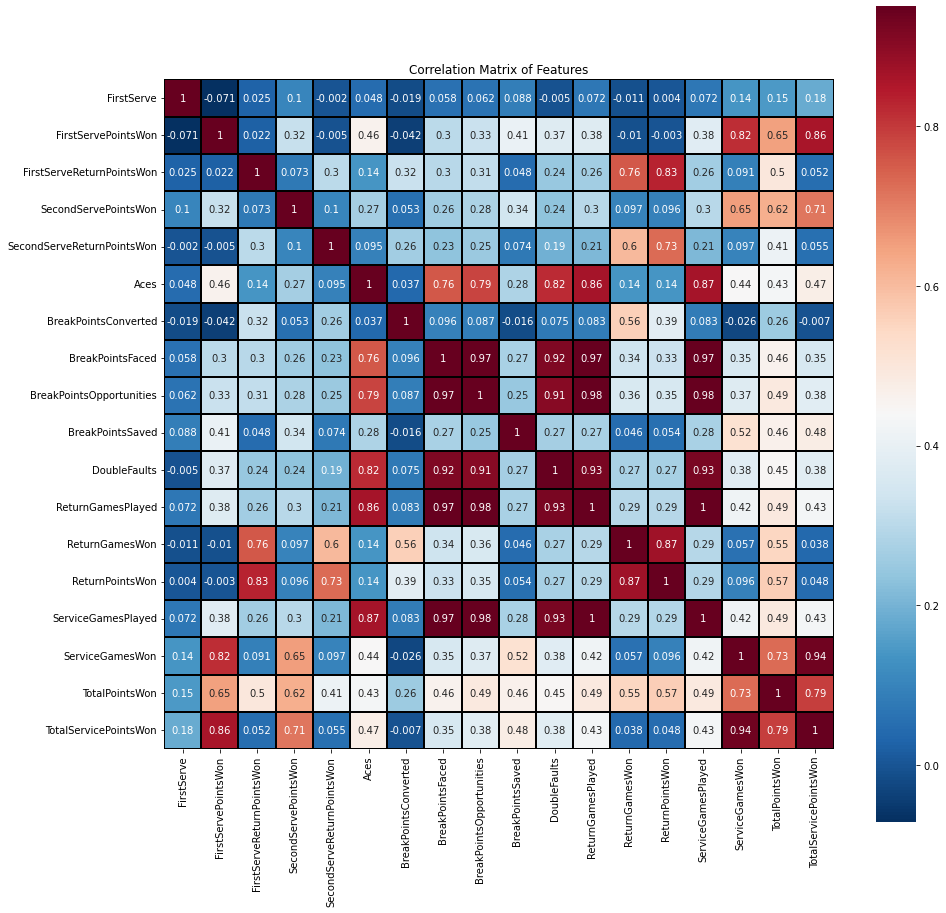

In [20]:
plt.figure(figsize =(15,15))
plt.title("Correlation Matrix of Features")
sns.heatmap(Feature_corr, vmax = 0.95, linewidths = 0.01, square=True, annot=True, cmap ='RdBu_r', linecolor ='black')
plt.show()

In [21]:
# Loop over bottom diagonal of correlation matrix
for i in range(len(Feature_corr.columns)):
    for j in range(i): 
        
        # Print variables with high correlation
        if abs(Feature_corr.iloc[i, j]) > 0.7:
            print(Feature_corr.columns[i], Feature_corr.columns[j], Feature_corr.iloc[i, j])

BreakPointsFaced Aces 0.757
BreakPointsOpportunities Aces 0.785
BreakPointsOpportunities BreakPointsFaced 0.973
DoubleFaults Aces 0.819
DoubleFaults BreakPointsFaced 0.918
DoubleFaults BreakPointsOpportunities 0.906
ReturnGamesPlayed Aces 0.864
ReturnGamesPlayed BreakPointsFaced 0.972
ReturnGamesPlayed BreakPointsOpportunities 0.979
ReturnGamesPlayed DoubleFaults 0.926
ReturnGamesWon FirstServeReturnPointsWon 0.757
ReturnPointsWon FirstServeReturnPointsWon 0.834
ReturnPointsWon SecondServeReturnPointsWon 0.727
ReturnPointsWon ReturnGamesWon 0.872
ServiceGamesPlayed Aces 0.866
ServiceGamesPlayed BreakPointsFaced 0.971
ServiceGamesPlayed BreakPointsOpportunities 0.978
ServiceGamesPlayed DoubleFaults 0.926
ServiceGamesPlayed ReturnGamesPlayed 1.0
ServiceGamesWon FirstServePointsWon 0.818
TotalPointsWon ServiceGamesWon 0.727
TotalServicePointsWon FirstServePointsWon 0.86
TotalServicePointsWon SecondServePointsWon 0.713
TotalServicePointsWon ServiceGamesWon 0.935
TotalServicePointsWon Total

In [22]:
# drop the features that show high correlation with the other predictors
Features = Features.drop(columns = ['BreakPointsFaced', 'BreakPointsOpportunities', 'DoubleFaults', 'ReturnGamesPlayed'
                                    , 'ReturnGamesWon', 'ReturnPointsWon', 'ServiceGamesPlayed', 'ServiceGamesWon'
                                    , 'TotalPointsWon','TotalServicePointsWon'], axis =1)
Features.head()

,FirstServe,FirstServePointsWon,FirstServeReturnPointsWon,SecondServePointsWon,SecondServeReturnPointsWon,Aces,BreakPointsConverted,BreakPointsSaved
0,0.88,0.50,0.38,0.50,0.39,0,0.14,0.43
1,0.84,0.62,0.26,0.33,0.07,7,0.00,0.57
2,0.83,0.60,0.28,0.53,0.44,2,0.38,0.40
3,0.83,0.64,0.34,0.59,0.33,2,0.33,0.40
4,0.81,0.54,0.00,0.33,0.33,1,0.00,0.50


In [23]:
Features.columns

Index(['FirstServe', 'FirstServePointsWon', 'FirstServeReturnPointsWon',
       'SecondServePointsWon', 'SecondServeReturnPointsWon', 'Aces',
       'BreakPointsConverted', 'BreakPointsSaved'],
      dtype='object')

## Checking for normality in distribution 

* In this section I investigate the distributions of my features. Skewness measures whether the distribution of the data is symmetrical, and kurtosis is a measures of the tails of the distribution (whether they are heavy or light).

    *Absolute skewness > 0.5 suggests that the data is skewed (negative and positive values are called Left Skew and Right Skew,  respectively)
    *kurtosis < 3 suggests the data is spread out and hence the distribution is flat (platykurtic), while kurtosis > 3 suggests that most of the data is close to the mean or at the extremes, i.e. tail of the distribution (leptokurtic).

In [24]:
# Create a function that will plot the distributions of the features in a given dataframe

def distribution_plot(dataframe):
    for ax, col in enumerate(dataframe.columns, 0):
        sns.distplot(dataframe[col], ax = axes[ax//n_cols, ax%n_cols])
        plt.tight_layout() 

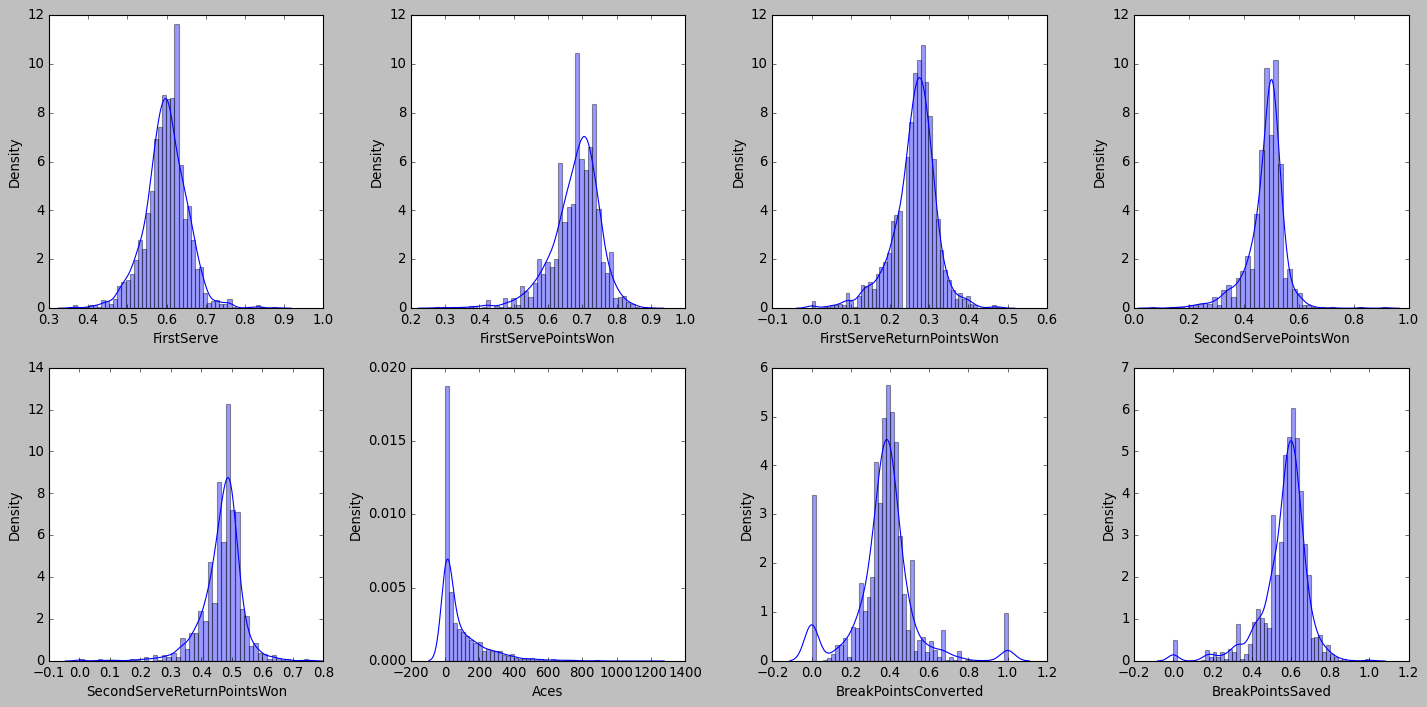

In [25]:
plt.style.use('classic')
n_rows=2
n_cols=4
fig, axes = plt.subplots(nrows= n_rows,  ncols= n_cols, figsize=(18,9))

distribution_plot(Features)
plt.show()


In [26]:
Features.skew(axis =0), Features.kurtosis(axis =0)

(FirstServe                   -0.024453
 FirstServePointsWon          -1.092462
 FirstServeReturnPointsWon    -0.817142
 SecondServePointsWon         -1.108387
 SecondServeReturnPointsWon   -1.455014
 Aces                          2.410634
 BreakPointsConverted          0.552724
 BreakPointsSaved             -1.593833
 dtype: float64,
 FirstServe                    1.754697
 FirstServePointsWon           2.921027
 FirstServeReturnPointsWon     2.576312
 SecondServePointsWon          5.170326
 SecondServeReturnPointsWon    7.499550
 Aces                          7.996418
 BreakPointsConverted          3.992389
 BreakPointsSaved              5.145077
 dtype: float64)

## Model Fitting:

### Standard Normalizing the features
* Given the diagnosis of the selected features above (distribution plots and skewness/kurtosis), it is clear that not all features are normally distributed. I will transform my features using a library called SkLearn.preprocessing.PowerTransformer. This library also performs the standrization (mean = 0, standard deviation = 1) for us.
* I will first adopt the hold-out validation data set approach.

### Test Set Validation approach: Train-Test Split Data
*Now that I have my features selected, I will prepare my dependent and independent variables for preprocessing and model fitting
*I am holding 20% of my data (345 rows) for testing the model.

In [27]:
from sklearn.model_selection import train_test_split  #import library

X = Features
y = Outcomes['Winnings']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
#y_test.head()

In [28]:
from sklearn.preprocessing import PowerTransformer
Transformer = PowerTransformer(method='yeo-johnson', standardize=True) # yeo-johnson accepts positive and negative values

x_train_scaled = pd.DataFrame(Transformer.fit_transform(x_train), columns = ['FirstServe', 'FirstServePointsWon'
                                                                             , 'FirstServeReturnPointsWon'
                                                                             ,'SecondServePointsWon'
                                                                             , 'SecondServeReturnPointsWon', 'Aces'
                                                                             , 'BreakPointsConverted', 'BreakPointsSaved'])

# Transform the test data using the fit lambdas from the train set (prevent data leakage):
x_test_scaled = pd.DataFrame(Transformer.transform(x_test) ,columns = ['FirstServe', 'FirstServePointsWon'
                                                                 , 'FirstServeReturnPointsWon'
                                                                 ,'SecondServePointsWon', 'SecondServeReturnPointsWon'
                                                                 , 'Aces','BreakPointsConverted', 'BreakPointsSaved'])

In [29]:
print(Transformer.lambdas_)

[0.9352798  7.11499249 4.67549255 3.57961706 4.82376392 0.061875
 0.46304454 4.96367701]


* The below plots and skewness/kurtosis measures indicate that the train data is fairly normal and standarized. Although a couple of the features show high positive kurtosis ( SecondServePointsWon 9.607428, SecondServeReturnPointsWon 4.629997), which shows that they have narrow shoulders with the data mostly being around the mean = 0. However, I think it is fair to move forward to the model fitting process now.
* Also the distribution plot of the scaled training data can be seen below, and they seem fairly normal.

In [30]:
x_train_scaled.skew(axis =0), x_train_scaled.kurtosis(axis =0)

(FirstServe                    0.020814
 FirstServePointsWon           0.052378
 FirstServeReturnPointsWon     0.122799
 SecondServePointsWon          0.344163
 SecondServeReturnPointsWon    0.290505
 Aces                         -0.037433
 BreakPointsConverted          0.054569
 BreakPointsSaved              0.211302
 dtype: float64,
 FirstServe                    1.970750
 FirstServePointsWon           0.784691
 FirstServeReturnPointsWon     2.147646
 SecondServePointsWon          9.607428
 SecondServeReturnPointsWon    4.629997
 Aces                         -1.077357
 BreakPointsConverted          3.090490
 BreakPointsSaved              3.206481
 dtype: float64)

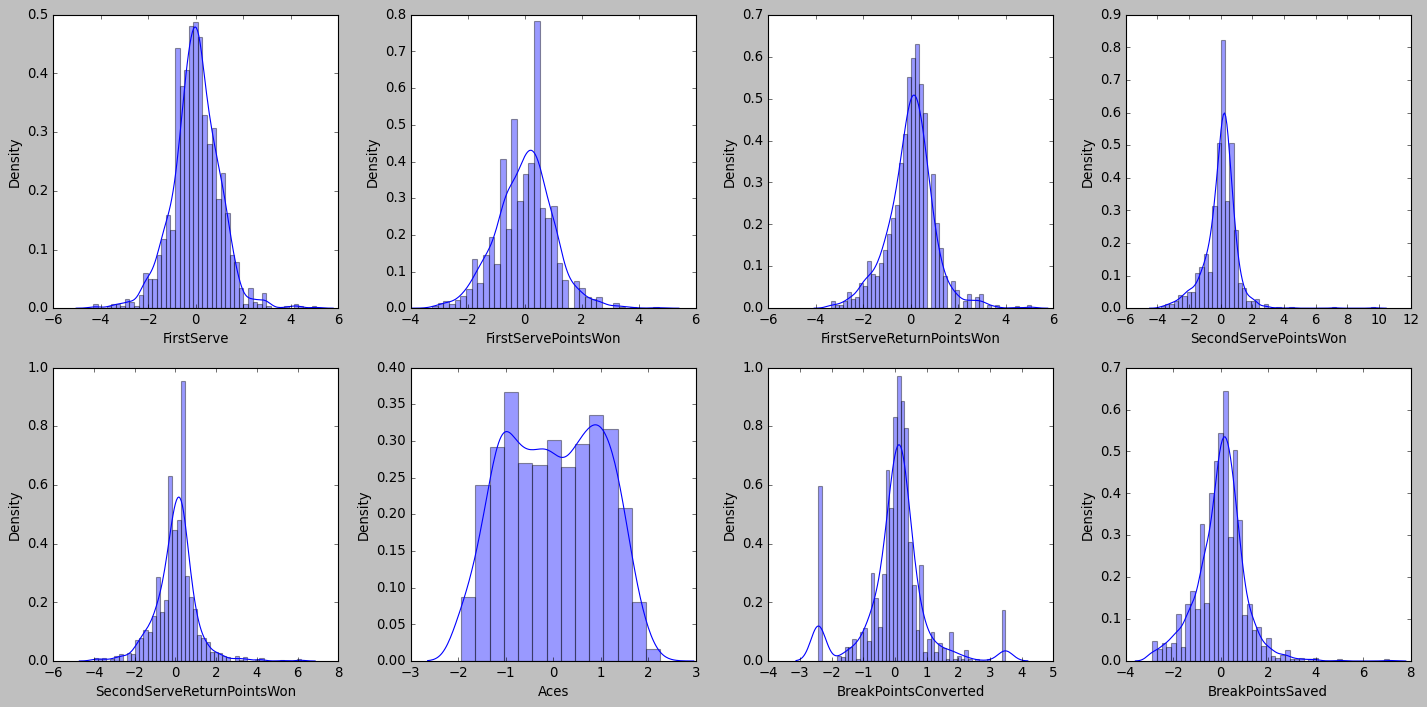

In [31]:
plt.style.use('classic')
n_rows=2
n_cols=4
fig, axes = plt.subplots(nrows= n_rows,  ncols= n_cols, figsize=(18,9))

distribution_plot(x_train_scaled)
plt.show()

###  Molde perfomance on test set: Score = 67.6%

In [32]:
from sklearn.linear_model import LinearRegression

In [33]:
mlr1 = LinearRegression()
mlr1.fit(x_train_scaled, y_train)
mlr1.score(x_test_scaled, y_test)

0.6756826887746321

### Using K-Fold Cross Validation
### Model performance using the K-Fold cross validation approach Score = 61.8%
   * Below I try to see if I can improve my my score (coefficient of determination/R-squared) by conducting cross validation in modelling my data. I will use K-Fold cross validation. 
   * Also, important to note that I will apply the scaling process over my features again as I will be normalizing the entirety of the data.
#### The results show that the average score of a 5 folds cross validations is lower than the accuracy of the model when tested on a hold-out test set.

In [34]:
X = Features
y = Outcomes['Winnings']
Features.shape

(1721, 8)

In [35]:
X_scaled = pd.DataFrame(Transformer.fit_transform(Features), columns = ['FirstServe', 'FirstServePointsWon'
                                                                             , 'FirstServeReturnPointsWon'
                                                                             ,'SecondServePointsWon'
                                                                             , 'SecondServeReturnPointsWon', 'Aces'
                                                                             , 'BreakPointsConverted', 'BreakPointsSaved'])

In [36]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [37]:
kfold_validation = (5)

In [38]:
mlr2 = LinearRegression()
cv = cross_val_score(mlr2,X_scaled, y, cv = kfold_validation)
print(cv)
print(cv.mean())

[0.67752536 0.60066341 0.61295263 0.64153534 0.55888211]
0.6183117695148516


### One of the ways by which we can check the robustness of a multivariate linear regression is to test for Multicollinearity in the model.
    * In order to do that I use the VIF (Variation Inflation Factor) technique. VIF measures the collinearity of a feature wiith the other features. 
    * VIF = 1 / (1 -r-squared)
    * Usually a VIF > 5 indicates that the variable is highly correlated with one or multiple of the other variables in the model, and perhaps should be dropped.
* I define a function that checks VIF in each of the features/columns of our data.

In [39]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [40]:
def check_VIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

#### The results show that the features used in the regression model do not show multicollinearity (all show VIF < 5). Therefore the model seems robust in this aspect. 

In [41]:
check_VIF(X_scaled)

,Features,VIF
1,FirstServePointsWon,1.77
5,Aces,1.77
7,BreakPointsSaved,1.30
2,FirstServeReturnPointsWon,1.23
3,SecondServePointsWon,1.22
6,BreakPointsConverted,1.18
4,SecondServeReturnPointsWon,1.15
0,FirstServe,1.05


# Wrapper Methods for Feature Selection
* Here I explore a different technique to try and improve the model performance / score. I use Wrapper method for feature selection instead of the above filter methods.
    * The main advantage is that wrapper methods evaluate features based on their performance with a specific model. Filter methods, on the other hand, can’t tell how important a feature is to a model.
    
    * Additionally, sometimes features do not perform well alone in a model, but perform better when included with another feature(s). Wrapper method take this aspect into account (by using subsets of different selections of features iteratively) and solves this problem for us. 
    
* I apply a Sequential Backward floating Elimination wrapper technique from the mlxtend module (I use the floating attribute)
    * I choose the floating method to backward select features in order to allow for the possiblity of combinations of features improving the model's performance, since the greedy algorithmic process of the SFS without floating does not take that into consideration. 
    
    * I use the LinearRegression as my estimator for feature selection and use the coefficient of detrmination as a scoring method for the feature subsets (average of 5 cross validation folds).
    
    * More importantly, even though I am using the sequential feature elimination technique, I am also incorporating the filter methods from earlier. I look at the correlation matrix again, this time filtering highly correlated variables (one/the first of the two correlated variable). However this time I try eliminating extremely high correlated features; such as those with a correlation greater than 0.9 instead of the 0.7 conventional threshold from earlier.

In [42]:
# Drop the Identifying data (player and years columns), as well as the outcome features. 
Features = df.drop(columns = ['Player', 'Year', 'Wins', 'Losses', 'Winnings', 'Ranking'], axis =1)
y = Outcomes['Winnings']

In [43]:
Feature_corr = Features.corr(method= 'pearson').round(3)
Feature_corr

,FirstServe,FirstServePointsWon,FirstServeReturnPointsWon,SecondServePointsWon,SecondServeReturnPointsWon,Aces,BreakPointsConverted,BreakPointsFaced,BreakPointsOpportunities,BreakPointsSaved,DoubleFaults,ReturnGamesPlayed,ReturnGamesWon,ReturnPointsWon,ServiceGamesPlayed,ServiceGamesWon,TotalPointsWon,TotalServicePointsWon
FirstServe,1.000,-0.071,0.025,0.101,-0.002,0.048,-0.019,0.058,0.062,0.088,-0.005,0.072,-0.011,0.004,0.072,0.137,0.148,0.181
FirstServePointsWon,-0.071,1.000,0.022,0.321,-0.005,0.460,-0.042,0.302,0.325,0.406,0.373,0.375,-0.010,-0.003,0.376,0.818,0.649,0.860
FirstServeReturnPointsWon,0.025,0.022,1.000,0.073,0.301,0.140,0.324,0.296,0.313,0.048,0.245,0.262,0.757,0.834,0.261,0.091,0.497,0.052
SecondServePointsWon,0.101,0.321,0.073,1.000,0.104,0.266,0.053,0.259,0.278,0.340,0.236,0.296,0.097,0.096,0.297,0.651,0.623,0.713
SecondServeReturnPointsWon,-0.002,-0.005,0.301,0.104,1.000,0.095,0.264,0.234,0.250,0.074,0.193,0.210,0.604,0.727,0.210,0.097,0.409,0.055
Aces,0.048,0.460,0.140,0.266,0.095,1.000,0.037,0.757,0.785,0.283,0.819,0.864,0.140,0.138,0.866,0.441,0.429,0.472
BreakPointsConverted,-0.019,-0.042,0.324,0.053,0.264,0.037,1.000,0.096,0.087,-0.016,0.075,0.083,0.562,0.387,0.083,-0.026,0.255,-0.007
BreakPointsFaced,0.058,0.302,0.296,0.259,0.234,0.757,0.096,1.000,0.973,0.272,0.918,0.972,0.335,0.331,0.971,0.354,0.463,0.354
BreakPointsOpportunities,0.062,0.325,0.313,0.278,0.250,0.785,0.087,0.973,1.000,0.248,0.906,0.979,0.358,0.353,0.978,0.372,0.491,0.381
BreakPointsSaved,0.088,0.406,0.048,0.340,0.074,0.283,-0.016,0.272,0.248,1.000,0.265,0.274,0.046,0.054,0.275,0.518,0.464,0.476


In [44]:
# Loop over bottom diagonal of correlation matrix
for i in range(len(Feature_corr.columns)):
    for j in range(i):
        
        # Print variables with high correlation
        if abs(Feature_corr.iloc[i, j]) > 0.9:
            print(Feature_corr.columns[i], Feature_corr.columns[j], Feature_corr.iloc[i, j])

BreakPointsOpportunities BreakPointsFaced 0.973
DoubleFaults BreakPointsFaced 0.918
DoubleFaults BreakPointsOpportunities 0.906
ReturnGamesPlayed BreakPointsFaced 0.972
ReturnGamesPlayed BreakPointsOpportunities 0.979
ReturnGamesPlayed DoubleFaults 0.926
ServiceGamesPlayed BreakPointsFaced 0.971
ServiceGamesPlayed BreakPointsOpportunities 0.978
ServiceGamesPlayed DoubleFaults 0.926
ServiceGamesPlayed ReturnGamesPlayed 1.0
TotalServicePointsWon ServiceGamesWon 0.935


In [45]:
# drop the features that show high correlation with the other predictors
Features = Features.drop(columns = ['BreakPointsOpportunities', 'DoubleFaults', 'ReturnGamesPlayed'
                                    ,'ServiceGamesPlayed', 'TotalServicePointsWon'], axis = 1)

In [46]:
Features.columns

Index(['FirstServe', 'FirstServePointsWon', 'FirstServeReturnPointsWon',
       'SecondServePointsWon', 'SecondServeReturnPointsWon', 'Aces',
       'BreakPointsConverted', 'BreakPointsFaced', 'BreakPointsSaved',
       'ReturnGamesWon', 'ReturnPointsWon', 'ServiceGamesWon',
       'TotalPointsWon'],
      dtype='object')

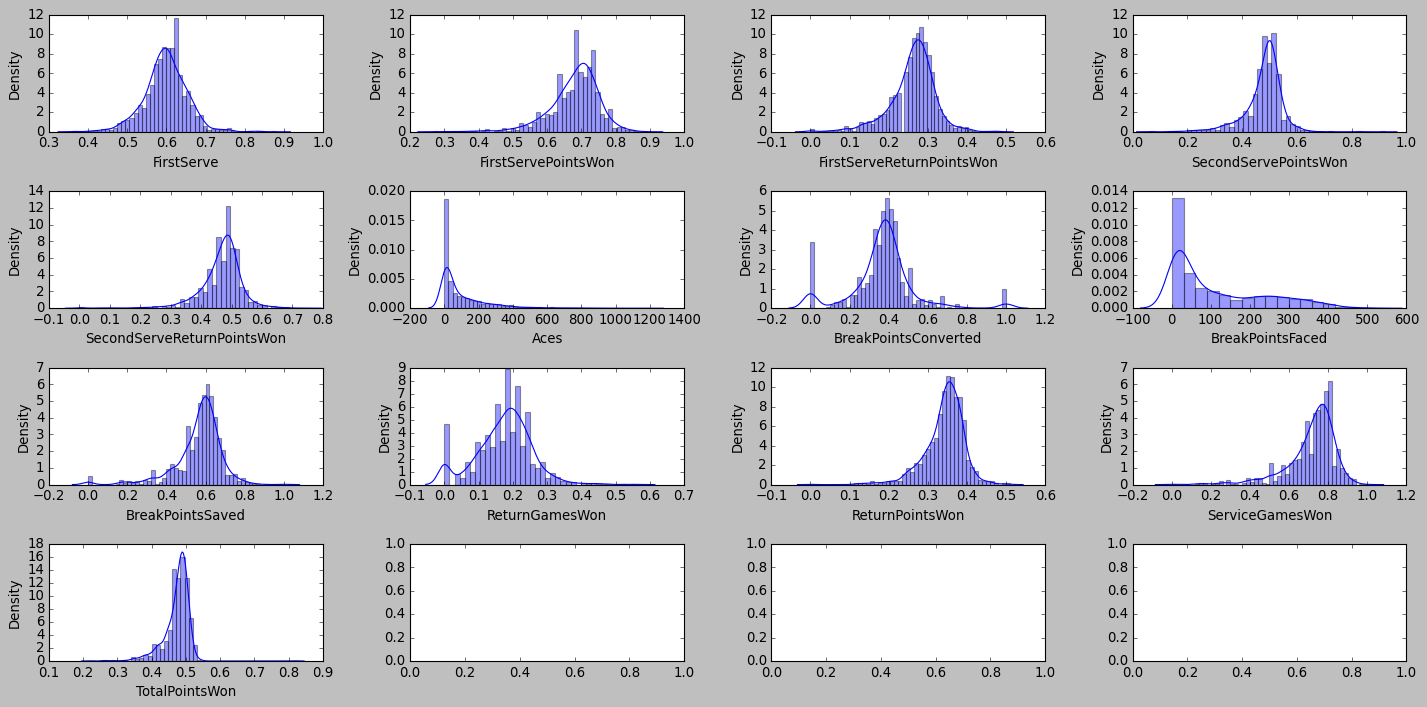

In [47]:
# First inspect the distribution plots

plt.style.use('classic')
n_rows=4
n_cols=4
fig, axes = plt.subplots(nrows= n_rows,  ncols= n_cols, figsize=(18,9))

distribution_plot(Features)
plt.show()

#### Split the data to a model training set and a test set

In [48]:
X = Features
y = Outcomes['Winnings']
Features.shape

(1721, 13)

In [49]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [50]:
x_train_scaled = pd.DataFrame(Transformer.fit_transform(x_train), columns = ['FirstServe', 'FirstServePointsWon'
                                                                    , 'FirstServeReturnPointsWon','SecondServePointsWon'
                                                                    , 'SecondServeReturnPointsWon', 'Aces'
                                                                    ,'BreakPointsConverted', 'BreakPointsFaced'
                                                                    , 'BreakPointsSaved','ReturnGamesWon', 'ReturnPointsWon'
                                                                    , 'ServiceGamesWon','TotalPointsWon'])

# Transform the test data using the fit lambdas from the train set (prevent data leakage):
x_test_scaled = pd.DataFrame(Transformer.transform(x_test) ,columns = ['FirstServe', 'FirstServePointsWon'
                                                                    , 'FirstServeReturnPointsWon','SecondServePointsWon'
                                                                    , 'SecondServeReturnPointsWon', 'Aces'
                                                                    ,'BreakPointsConverted', 'BreakPointsFaced'
                                                                    , 'BreakPointsSaved','ReturnGamesWon', 'ReturnPointsWon'
                                                                    , 'ServiceGamesWon','TotalPointsWon'])

### Below, after the scaling the train data seem fairly normally distributed.

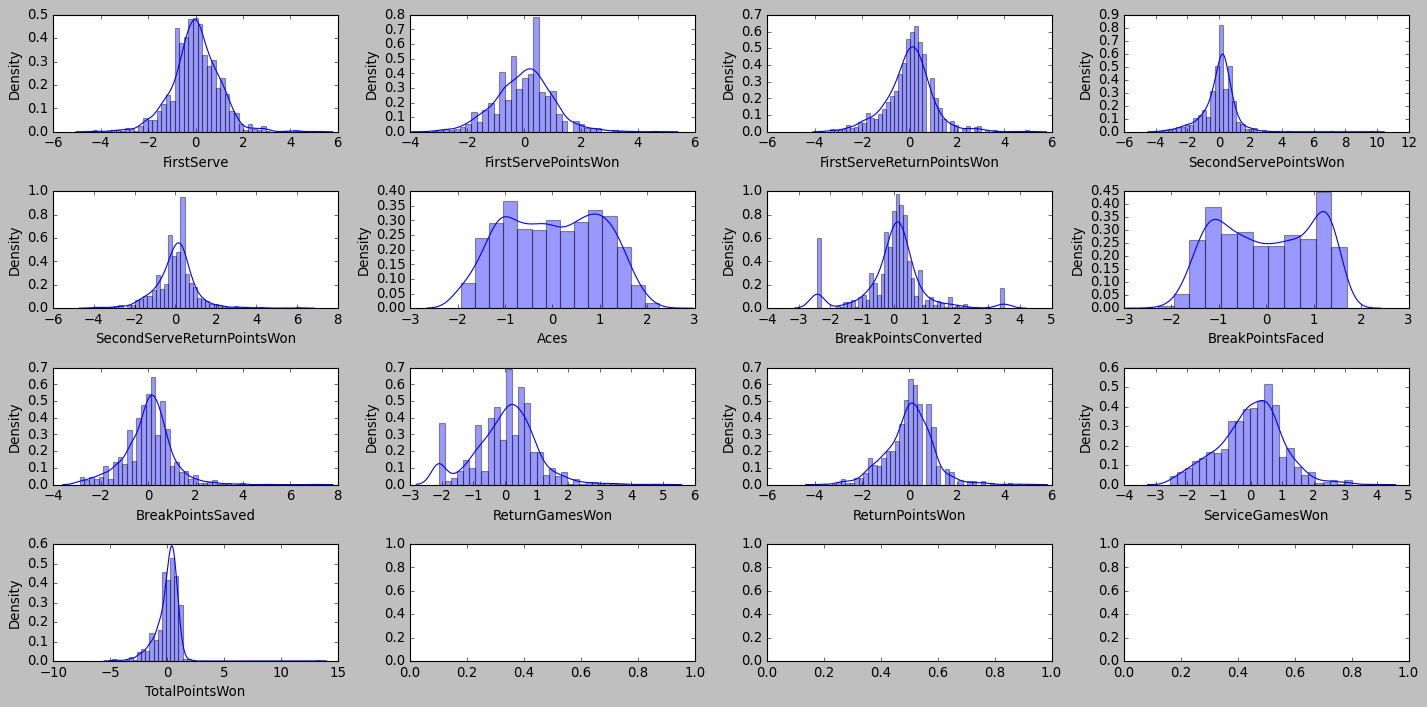

In [51]:
plt.style.use('classic')
n_rows=4
n_cols=4
fig, axes = plt.subplots(nrows= n_rows,  ncols= n_cols, figsize=(18,9))

distribution_plot(x_train_scaled)
plt.show()

In [52]:
# Import the SequentialFeatureSelection library from mlxtend
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [53]:
model = LinearRegression()

In [54]:
sbs = SFS(model,
          k_features=(1, 13),
          forward=False,
          floating=True,
          scoring= 'r2',
          n_jobs = -1,
          verbose = 2 ,
          cv= 5)

In [55]:
# Fit wrapper technique for model selection
sbs.fit(x_train_scaled, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  13 | elapsed:    2.8s remaining:    4.6s
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed:    3.1s finished

[2023-02-19 22:33:12] Features: 12/1 -- score: 0.660484687844306[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    0.0s finished

[2023-02-19 22:33:12] Features: 11/1 -- score: 0.663404515674747[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  11 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  

SequentialFeatureSelector(estimator=LinearRegression(), floating=True,
                          forward=False, k_features=(1, 13), n_jobs=-1,
                          scoring='r2', verbose=2)

### The highest average score is for five features (66.6%)

In [56]:
pd.DataFrame.from_dict(sbs.get_metric_dict()).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
13,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)","[0.6665483375214676, 0.5165844869200126, 0.684...",0.628337,"(FirstServe, FirstServePointsWon, FirstServeRe...",0.075445,0.058699,0.029349
12,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11)","[0.6667960348220432, 0.68383604908916, 0.68237...",0.660485,"(FirstServe, FirstServePointsWon, FirstServeRe...",0.02813,0.021886,0.010943
11,"(0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11)","[0.6670771527432302, 0.6971365620925362, 0.682...",0.663405,"(FirstServe, FirstServePointsWon, FirstServeRe...",0.032026,0.024918,0.012459
10,"(1, 2, 4, 5, 6, 7, 8, 9, 10, 11)","[0.6670816696038759, 0.7010812222870164, 0.683...",0.664545,"(FirstServePointsWon, FirstServeReturnPointsWo...",0.03331,0.025917,0.012958
9,"(2, 4, 5, 6, 7, 8, 9, 10, 11)","[0.6669746271878166, 0.7027460681551563, 0.683...",0.66482,"(FirstServeReturnPointsWon, SecondServeReturnP...",0.033975,0.026433,0.013217
8,"(4, 5, 6, 7, 8, 9, 10, 11)","[0.6668764111576131, 0.7025829873520599, 0.684...",0.66498,"(SecondServeReturnPointsWon, Aces, BreakPoints...",0.034091,0.026524,0.013262
7,"(4, 5, 6, 7, 8, 9, 11)","[0.6668808121649012, 0.7030173617306286, 0.684...",0.665251,"(SecondServeReturnPointsWon, Aces, BreakPoints...",0.033983,0.02644,0.01322
6,"(4, 5, 6, 7, 8, 11)","[0.666725419647626, 0.7043823214635718, 0.6845...",0.665442,"(SecondServeReturnPointsWon, Aces, BreakPoints...",0.03468,0.026982,0.013491
5,"(5, 6, 7, 8, 11)","[0.6664401537145634, 0.7050667772859496, 0.684...",0.665665,"(Aces, BreakPointsConverted, BreakPointsFaced,...",0.034622,0.026937,0.013469
4,"(5, 7, 8, 11)","[0.6656176441314323, 0.7067962646918853, 0.683...",0.665428,"(Aces, BreakPointsFaced, BreakPointsSaved, Ser...",0.035426,0.027563,0.013781


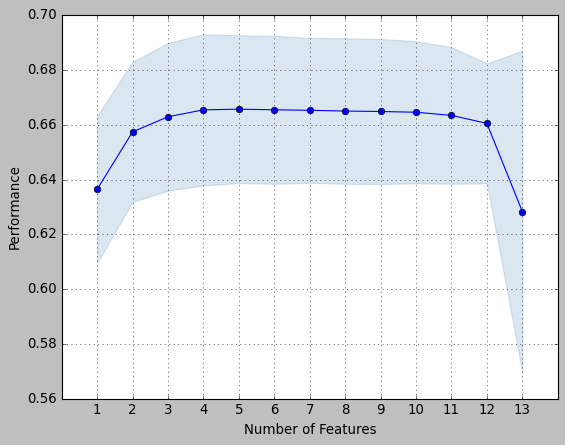

In [57]:
# Plotting the model performance against the number of features selected
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
plot_sfs(sbs.get_metric_dict())
plt.grid()
plt.show()

In [58]:
print(sbs.subsets_[3]['feature_names'])

('BreakPointsFaced', 'BreakPointsSaved', 'ServiceGamesWon')


In [59]:
print(sbs.subsets_[5])

{'feature_idx': (5, 6, 7, 8, 11), 'cv_scores': array([0.66644015, 0.70506678, 0.68421951, 0.63803612, 0.63456339]), 'avg_score': 0.6656651900620558, 'feature_names': ('Aces', 'BreakPointsConverted', 'BreakPointsFaced', 'BreakPointsSaved', 'ServiceGamesWon')}


In [60]:
print(sbs.subsets_[5]['avg_score'])

0.6656651900620558


In [61]:
# Make new dataframe with the five selected features
selected_scaled_x_train = pd.DataFrame(x_train[['Aces', 'BreakPointsConverted', 'BreakPointsFaced', 'BreakPointsSaved'
                                                 , 'ServiceGamesWon']])
selected_scaled_x_test = pd.DataFrame(x_test[['Aces', 'BreakPointsConverted', 'BreakPointsFaced', 'BreakPointsSaved'
                                                 , 'ServiceGamesWon']])


#### Below I run the linear regression model again using the validation test set approach and the K-Fold cross validation test approach. This time the model performs significantly better than when I filtered the features manually. Evidently, Seuential Feature Selector is a very effective library.

#### The score improved: 
#####    * from 67.6% to 81.6% for the validation test set approach and 
#####    * from 61.8% to 80.8% for the K-Fold cross validation test approach. 

In [62]:
mlr3 = LinearRegression()
mlr3.fit(selected_scaled_x_train, y_train)
mlr3.score(selected_scaled_x_test, y_test)

0.8158641324339206

In [63]:
mlr4 = LinearRegression()
cv = cross_val_score(mlr4,selected_scaled_x_train, y_train, cv = kfold_validation)
print(cv)
print(cv.mean())

[0.78696268 0.81774927 0.82522277 0.80251376 0.80901989]
0.8082936735813643


#### Finally, I check the model robustness against multicollinearity below using the check_VIF function. 
* This time I find that two of the 5 features selected using the SFS show high multicollinearity (VIF > 5).
* I drop these two features and run the models again and the scores show very minute changes:
        * Using validation test set the score changes from 81.6% to 81.4%
        *Using the K-folds cross validation approach the score changes from 80.8% to 80.7%
* The feature "BreakPointsConverted" had a VIF very close to 5, I decided to leave it in.

### Using the Wrapper feature selection method and a multiple linear regression model I reach the conclusion that the number of Aces, % of Break Points Converted, and number of Break Points Faced are the best predictors for a Tennis player's winnings (earnings). All three predictors show a positive correlation with earning of a Tennis player

In [64]:
check_VIF(selected_scaled_x_train)

,Features,VIF
4,ServiceGamesWon,31.88
3,BreakPointsSaved,29.55
1,BreakPointsConverted,5.35
2,BreakPointsFaced,4.92
0,Aces,4.00


In [65]:
# According to VIF check, I decide dropping the features ServiceGamesWon and BreakPointsSaved 
VIF_selected_scaled_x_train = pd.DataFrame(x_train[['Aces', 'BreakPointsConverted', 'BreakPointsFaced']])
VIF_selected_scaled_x_test = pd.DataFrame(x_test[['Aces', 'BreakPointsConverted', 'BreakPointsFaced']])

In [66]:
mlr5 = LinearRegression()
mlr5.fit(VIF_selected_scaled_x_train, y_train)
mlr5.score(VIF_selected_scaled_x_test, y_test)

0.8138313985118457

In [67]:
mlr6 = LinearRegression()
cv = cross_val_score(mlr6,VIF_selected_scaled_x_train, y_train, cv = kfold_validation)
print(cv)
print(cv.mean())

[0.78493678 0.81734119 0.82402458 0.80117309 0.80667004]
0.8068291363090208


In [68]:
print(mlr5.coef_)

[ 574.4924276  2908.01631332 1362.98759532]
